# 随机梯度下降

梯度是一个矢量，它告诉我们权重的方向。更准确地说，它告诉我们如何改变权重，使损失变化最快。我们称这个过程为梯度下降，因为它使用梯度使损失曲线下降到最小值。随机的意思是“由偶然决定的”。我们的训练是随机的，因为小批量是数据集中的随机样本。这就是为什么它被称为SGD!

本节主要介绍随机梯度下降的主要内容

首先导入随机梯度下降所需的minspore包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mindspore import Tensor

定义解析解，对参数进行计算

In [2]:
def ols_algebra(x, y):
    '''
    解析解
    '''
    n = len(x)
    w1 = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(x*x) - sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y)) / (n*sum(x*x) - sum(x)*sum(x))
    
    return w1,w0

通过最小二乘法定义梯度下降的算法过程。

In [3]:
def ols_gradient_descent(x,y,lr,num_iter):
    '''
    梯度下降解
    '''
    w1 = 0
    w0 = 0
    for i in range(num_iter):
        y_hat = (w1 * x)+ w0
        w1_gradient = -2 * sum(x*(y-y_hat))
        w0_gradient = -2*sum(y-y_hat)
        w1 -=lr * w1_gradient
        w0 -= lr* w0_gradient
    return w1,w0

使用plot函数对梯度下降结果进行绘图

In [4]:
def plot_pic(w1,w0,w1_,w0_,x,y):
    '''
    画图
    '''
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    w1 = w1.asnumpy()
    w0 = w0.asnumpy()
    w1_ = w1_.asnumpy()
    w0_ = w0_.asnumpy()
    x = x.asnumpy()
    y = y.asnumpy()

    axes[0].scatter(x,y)
    axes[0].plot(np.array([50,110]), np.array([50,110])*w1 + w0, 'r')
    axes[0].set_title('OLS')

    axes[1].scatter(x,y)
    axes[1].plot(np.array([50,110]), np.array([50,110])*w1_ + w0_, 'r')
    axes[1].set_title('Gradient descent')

    plt.show()

假设数据为自定义数据，x，y，经过解析，和最小二乘得到最终结果，最后使用绘图函数完成该过程

0.7175629
44.256042
1.2633123
0.12807482


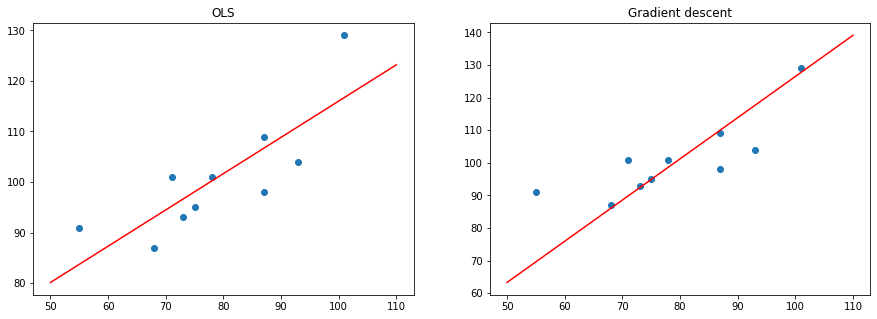

In [5]:
x = np.array([55,71,68,87,101,87,75,78,93,73])
y = np.array([91,101,87,109,129,98,95,101,104,93])

x = Tensor(x.astype(np.float32))
y = Tensor(y.astype(np.float32))

w1,w0 = ols_algebra(x,y)
print(w1)
print(w0)

w1_,w0_ = ols_gradient_descent(x,y,lr = 0.00001, num_iter = 500)
print(w1_)
print(w0_)

plot_pic(w1,w0,w1_,w0_,x,y)
